In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
fraud_d = pd.read_csv('data_for_student_case.csv', parse_dates='creationdate', index_col='creationdate')

In [3]:
fraud_d.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
creationdate,,,,,,,,,,,,,,,,
2015-07-01 23:03:11,1,2015-11-09 14:26:51,MX,mccredit,530056,64800,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email68370,ip111778,card184798
2015-07-02 04:50:55,2,2015-11-09 14:27:38,MX,mccredit,547046,44900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email101299,ip78749,card151595
2015-07-02 14:30:28,3,2015-11-23 16:34:16,MX,mccredit,528843,149900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email278604,ip70594,card242142
2015-07-03 07:53:37,4,2015-11-23 16:34:51,MX,mccredit,547146,109900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email47409,ip113648,card181744
2015-07-08 18:35:35,5,2015-11-09 14:26:08,MX,visaclassic,477291,89900,MXN,MX,Ecommerce,Chargeback,True,0,MexicoAccount,email205501,ip83553,card97271


In [4]:
fraud_d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290382 entries, 2015-07-01 23:03:11 to 2015-10-31 23:55:02
Data columns (total 16 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id                       

In [5]:
null_data = fraud_d[fraud_d.isnull().any(axis=1)]

In [6]:
null_data[null_data['simple_journal'] == 'Refused']

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
creationdate,,,,,,,,,,,,,,,,
2015-07-01 02:31:23,171,2015-07-01 02:31:24,NaN,visa,444087,109900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email33361,ip70027,card112179
2015-07-01 07:28:27,207,2015-07-01 07:28:28,NaN,visa,476684,119900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email17821,ip66918,card48192
2015-07-01 08:01:29,216,2015-07-01 08:01:29,NaN,visa,453963,29900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email118109,ip69644,card104926
2015-07-03 08:01:36,618,2015-07-03 08:01:37,NaN,mc,559209,119900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email331195,ip110477,card232991
2015-07-03 08:02:06,619,2015-07-03 08:02:07,NaN,mc,559209,119900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email331195,ip110477,card163664
2015-07-03 08:03:22,621,2015-07-03 08:03:22,NaN,mc,559209,119900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email331195,ip110477,card12992
2015-07-03 08:17:50,623,2015-07-03 08:17:51,NaN,visa,476684,39900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email36614,ip85016,card248667
2015-07-03 21:17:53,730,2015-07-03 21:18:08,NaN,visa,476684,34900,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email205217,ip83835,card222161
2015-07-06 03:48:56,1121,2015-07-06 03:48:56,MX,mccredit,NaN,157800,MXN,MX,Ecommerce,Refused,True,0,MexicoAccount,email339087,ip67466,card238161


In [9]:
clean_fd = fraud_d.dropna()

In [10]:
clean_fd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274567 entries, 2015-07-01 23:03:11 to 2015-10-31 23:55:02
Data columns (total 16 columns):
txid                            274567 non-null int64
bookingdate                     274567 non-null object
issuercountrycode               274567 non-null object
txvariantcode                   274567 non-null object
bin                             274567 non-null float64
amount                          274567 non-null float64
currencycode                    274567 non-null object
shoppercountrycode              274567 non-null object
shopperinteraction              274567 non-null object
simple_journal                  274567 non-null object
cardverificationcodesupplied    274567 non-null object
cvcresponsecode                 274567 non-null int64
accountcode                     274567 non-null object
mail_id                         274567 non-null object
ip_id                           274567 non-null object
card_id                       

In [11]:
clean_fd['simple_journal'].value_counts()

Settled       223165
Refused        51057
Chargeback       345
dtype: int64

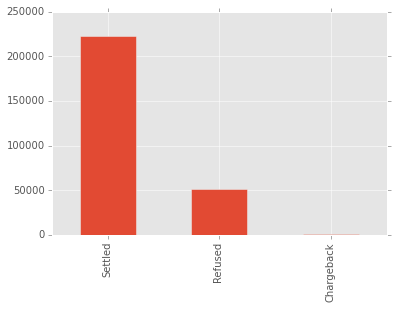

In [12]:
clean_fd['simple_journal'].value_counts().plot(kind = 'bar')

In [15]:
clean_fd[clean_fd['cvcresponsecode'] == 5]

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
creationdate,,,,,,,,,,,,,,,,
2015-07-05 15:40:45,210764,2015-07-08 03:36:12,FI,visadebit,492057,6395,GBP,GB,Ecommerce,Settled,True,5,UKAccount,email26383,ip318522,card20007
2015-07-18 20:58:39,236261,2015-07-20 22:47:19,IN,visadebit,445063,13400,GBP,GB,Ecommerce,Settled,True,5,UKAccount,email344360,ip36114,card67693
2015-08-04 09:10:22,263623,2015-08-06 22:13:22,HK,visaplatinum,414004,8650,GBP,HK,Ecommerce,Settled,True,5,UKAccount,email212434,ip25986,card210558
2015-08-28 20:25:42,307152,2015-08-31 19:12:32,HK,visaplatinum,414004,12325,GBP,HK,Ecommerce,Settled,True,5,UKAccount,email212435,ip31327,card210558
2015-09-03 15:09:54,318097,2015-09-07 10:19:35,GH,visadebit,409628,2195,GBP,GH,Ecommerce,Settled,True,5,UKAccount,email265485,ip142671,card234202
2015-09-05 22:29:25,322006,2015-09-08 00:35:38,IN,visadebit,445063,3825,GBP,GB,Ecommerce,Settled,True,5,UKAccount,email269332,ip348377,card253912
2015-09-06 16:41:31,322806,2015-09-08 00:42:29,HK,visaclassic,450885,17170,GBP,HK,Ecommerce,Settled,True,5,UKAccount,email253852,ip31331,card174285
2015-09-23 04:56:55,349746,2015-09-25 17:41:52,BB,visabusiness,426819,4600,GBP,BB,Ecommerce,Settled,True,5,UKAccount,email16269,ip163126,card140371
2015-09-27 18:20:52,355275,2015-09-28 19:08:07,IN,visadebit,445063,1670,GBP,GB,Ecommerce,Settled,True,5,UKAccount,email289831,ip135129,card145016


In [14]:
null_data[null_data['cvcresponsecode'] == 6]

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id
creationdate,,,,,,,,,,,,,,,,


In [16]:
clean_fd['cvc_clean'] = clean_fd['cvcresponsecode'].replace(5, 3)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
clean_fd[clean_fd['cvc_clean'] == 3]

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,cvc_clean
creationdate,,,,,,,,,,,,,,,,,
2015-07-01 21:28:12,203278,2015-07-02 22:35:31,ES,mccredit,540209,2495,GBP,ES,Ecommerce,Settled,True,3,UKAccount,email12867,ip287677,card251616,3
2015-07-03 01:19:48,206073,2015-07-07 02:02:03,GB,mccredit,530122,2595,GBP,GB,ContAuth,Settled,False,3,UKAccount,email133557,ip162465,card172598,3
2015-07-03 13:30:45,206607,2015-07-06 21:37:56,ES,visadebit,465572,3695,GBP,GB,Ecommerce,Settled,True,3,UKAccount,email37988,ip177970,card72194,3
2015-07-05 15:40:45,210764,2015-07-08 03:36:12,FI,visadebit,492057,6395,GBP,GB,Ecommerce,Settled,True,5,UKAccount,email26383,ip318522,card20007,3
2015-07-12 00:01:28,224849,2015-07-15 00:04:55,GB,mccredit,530126,10880,GBP,GB,ContAuth,Settled,False,3,UKAccount,email344794,ip350552,card159454,3
2015-07-12 10:54:18,225366,2015-07-14 03:19:36,ES,mccredit,548901,6160,GBP,ES,Ecommerce,Settled,True,3,UKAccount,email8091,ip291619,card180745,3
2015-07-12 22:19:18,227842,2015-07-15 01:01:14,ES,visadebit,459990,2295,GBP,DE,Ecommerce,Settled,True,3,UKAccount,email113221,ip53541,card165921,3
2015-07-13 21:25:58,229886,2015-07-17 00:09:07,ES,mccredit,540205,11450,GBP,GB,Ecommerce,Settled,True,3,UKAccount,email198838,ip257834,card219033,3
2015-07-13 23:25:12,230162,2015-07-17 00:01:24,GB,mccredit,542011,15498,GBP,GB,Ecommerce,Settled,True,3,UKAccount,email204830,ip200159,card225823,3


In [22]:
clean_fd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274567 entries, 2015-07-01 23:03:11 to 2015-10-31 23:55:02
Data columns (total 17 columns):
txid                            274567 non-null int64
bookingdate                     274567 non-null object
issuercountrycode               274567 non-null object
txvariantcode                   274567 non-null object
bin                             274567 non-null float64
amount                          274567 non-null float64
currencycode                    274567 non-null object
shoppercountrycode              274567 non-null object
shopperinteraction              274567 non-null object
simple_journal                  274567 non-null object
cardverificationcodesupplied    274567 non-null object
cvcresponsecode                 274567 non-null int64
accountcode                     274567 non-null object
mail_id                         274567 non-null object
ip_id                           274567 non-null object
card_id                       

In [57]:
cols_to_change = ['issuercountrycode', 'txvariantcode', 'currencycode', 'shoppercountrycode', 'shopperinteraction',
                  'cardverificationcodesupplied', 'accountcode', 'cvc_clean' ]

In [58]:
clean_fd_hot = pd.get_dummies(clean_fd, columns = cols_to_change)

In [59]:
clean_fd['shoppercountrycode'].nunique()

153

In [60]:
clean_fd_hot.drop(['txid', 'bookingdate'], axis=1, inplace=True)

In [72]:
clean_fd_hot_without_ref = clean_fd_hot[clean_fd_hot['simple_journal'] != 'Refused']

In [73]:
clean_fd_hot_without_ref[clean_fd_hot_without_ref['simple_journal'] == 'Refused']

,bin,amount,simple_journal,cvcresponsecode,mail_id,ip_id,card_id,issuercountrycode_AD,issuercountrycode_AE,issuercountrycode_AI,...,cardverificationcodesupplied_False,cardverificationcodesupplied_True,accountcode_APACAccount,accountcode_MexicoAccount,accountcode_SwedenAccount,accountcode_UKAccount,cvc_clean_0,cvc_clean_1,cvc_clean_2,cvc_clean_3
creationdate,,,,,,,,,,,,,,,,,,,,,


In [74]:
clean_fd_hot_without_ref.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223510 entries, 2015-07-01 23:03:11 to 2015-10-31 23:55:02
Columns: 327 entries, bin to cvc_clean_3
dtypes: float64(322), int64(1), object(4)
memory usage: 559.3+ MB


In [75]:
clean_fd_hot_without_ref.head()

,bin,amount,simple_journal,cvcresponsecode,mail_id,ip_id,card_id,issuercountrycode_AD,issuercountrycode_AE,issuercountrycode_AI,...,cardverificationcodesupplied_False,cardverificationcodesupplied_True,accountcode_APACAccount,accountcode_MexicoAccount,accountcode_SwedenAccount,accountcode_UKAccount,cvc_clean_0,cvc_clean_1,cvc_clean_2,cvc_clean_3
creationdate,,,,,,,,,,,,,,,,,,,,,
2015-07-01 23:03:11,530056,64800,Chargeback,0,email68370,ip111778,card184798,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-02 04:50:55,547046,44900,Chargeback,0,email101299,ip78749,card151595,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-02 14:30:28,528843,149900,Chargeback,0,email278604,ip70594,card242142,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-03 07:53:37,547146,109900,Chargeback,0,email47409,ip113648,card181744,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-08 18:35:35,477291,89900,Chargeback,0,email205501,ip83553,card97271,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [78]:
clean_fd_hot_without_ref.drop(['cvcresponsecode'], axis = 1,inplace=True)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
clean_fd_hot_without_ref['simple_journal'].value_counts()

Settled       223165
Chargeback       345
dtype: int64

In [81]:
clean_fd_hot_without_ref.head()

,bin,amount,simple_journal,mail_id,ip_id,card_id,issuercountrycode_AD,issuercountrycode_AE,issuercountrycode_AI,issuercountrycode_AL,...,cardverificationcodesupplied_False,cardverificationcodesupplied_True,accountcode_APACAccount,accountcode_MexicoAccount,accountcode_SwedenAccount,accountcode_UKAccount,cvc_clean_0,cvc_clean_1,cvc_clean_2,cvc_clean_3
creationdate,,,,,,,,,,,,,,,,,,,,,
2015-07-01 23:03:11,530056,64800,Chargeback,email68370,ip111778,card184798,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-02 04:50:55,547046,44900,Chargeback,email101299,ip78749,card151595,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-02 14:30:28,528843,149900,Chargeback,email278604,ip70594,card242142,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-03 07:53:37,547146,109900,Chargeback,email47409,ip113648,card181744,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-08 18:35:35,477291,89900,Chargeback,email205501,ip83553,card97271,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [86]:
encoded_features = clean_fd_hot_without_ref.ix[:, 6:]

In [87]:
encoded_features

,issuercountrycode_AD,issuercountrycode_AE,issuercountrycode_AI,issuercountrycode_AL,issuercountrycode_AM,issuercountrycode_AO,issuercountrycode_AR,issuercountrycode_AT,issuercountrycode_AU,issuercountrycode_AZ,...,cardverificationcodesupplied_False,cardverificationcodesupplied_True,accountcode_APACAccount,accountcode_MexicoAccount,accountcode_SwedenAccount,accountcode_UKAccount,cvc_clean_0,cvc_clean_1,cvc_clean_2,cvc_clean_3
creationdate,,,,,,,,,,,,,,,,,,,,,
2015-07-01 23:03:11,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-02 04:50:55,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-02 14:30:28,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-03 07:53:37,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-08 18:35:35,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-08 23:04:26,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-09 02:31:36,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-09 04:56:48,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2015-07-09 22:55:40,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [88]:
from sklearn.decomposition import PCA as skPCA

In [93]:
pca = skPCA(n_components=3)
pca_transf = pca.fit(encoded_features)

In [94]:
print pca_transf.explained_variance_ratio_

[ 0.45615798  0.16563539  0.10219184]


In [96]:
pca_transf

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1]:
clean_fd_hot_without_ref.head()

NameError: name 'clean_fd_hot_without_ref' is not defined